# Middle Square Algorithm for building Pseudo-Random Number Generator
## Implementation:

### random_number = middle_n_digits(seed^2); n = length(seed)

### we front-pad the value by 0 if the digits in the values < double the digits of the seed. Explanation -> seed = 1234 then n = 4; the value after squaring should atleast be 8 (2n) digits long because seed is 4 (n) digits long, if not then we pad it with 0's in the front and select the middle n digits.

#### example -
#### seed = 1234 (n=4) ; val = seed^2 = 1522756; front-pad by 0's(2n) val = 01522756, pick middle n=4 digits = 5227. Hence 5227 is our random number.

In [33]:
# Implementation of Middle Square Algorithm
seed = 1234567890
digits = len(str(seed))

def nextRand():
    global seed
    global digits
    n = str(seed**2)
    while(len(n)<digits*2):
        n = '0'+n
    seed = int(n[(digits//2):(digits//2+digits)])
    return seed


# tweaking the above function to get Floating point random numbers.
def nextRandfloat():
    return nextRand/9999999999


#printing the sequence of 20 random numbers generated by middle square algorithm.
for i in range(20):
    print(nextRand())

1578750190
4521624250
858581880
1628446643
8384690979
428133239
2980703366
5925560837
2712329881
7333833654
1160645429
978118585
7159663224
7774810980
6857747285
6978249248
9625672125
5638580020
5846419432
6201748672


# Trying to find the period of reapeating sequence in middle square algorithm.

### For various values I get a very less period which implies that we could easily find repeating sequences in Middle square method, which is unsuitable for a PRNG.

In [5]:
# initializing an empty list with adequate size to store sequence with possible repeats where the iteration will break
results = [0]*99999999


digits = 8
seed = 12345678

for i in range(1,100001):
    rand = nextRand()
    
    # if results list contains the rand element already it will detect a repeat and break out of the loop
    if results[rand]:
        break
        
    # each random variable is stored in results list
    results[rand]=True

# printing the ith iteration where the repeat was caught. 
print(i)

10452


# Linear Congruential Algorithm for PseudoRandomNumberGenerator

## Implementation:

### LCG works on the function: (seed*mult+incr)%mod. If we assign good values of mult,mod and incr then we could potentially have a good PRNG with high period of repeating sequence and less noticable pattern. LCG is completely unsuitable for Cryptographic purposes as although it has a less noticeable pattern, but still if we look at it properly , we could find a pattern.

## I am using LCG by assigning its parameter equal to the C++ minst_rand function.

#### mult = 48271, mod = (2^31)-1, increment = 0 and calculating (seed*mult+incr)%mod and returning value/mod to scale the random number.

### Seed is given based on system's time to ensure Randomness.

###  Randomness is tested by graphing a histogram distribution of Random variables which shows us that if we build a sequence of about 10^6 random variables then we could potentially have uniformly distributed points over a range with no noticeable patter or biasness. 

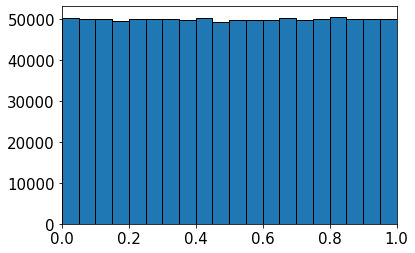

In [49]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# implementing LCG algorithm and implicitly generating a sequence of random variables by declaring a parameter size
def nextRandLCA(mult = 48271, mod = (2**31)-1, seed=123456789, size = 1):
    # results is a numpy list which will contain the sequence of random variables of size passed in the func.
    results = np.zeros(size)
    
    x = (mult*seed)%mod
    results[0] = x/mod
    
    for i in range(1,size):
        x = (mult*x)%mod
        results[i] = x/mod
        
    return results


# Implementing LCG algrithm that is constrained inside a range provided by specifying high and low parameters
def prngrange(low = 0, high = 1, mult = 48271, mod = (2**31)-1, seed=123456789, size = 1):
    return low+(high-low)*nextRandLCA(size = size)


""" Here, you can set the size variable according to yourself to verify that the distribution graph is being
plotted uniformly or is biased to some values. For larger sequences it will be uniform and for smaller sequences
it will be biased."""
size = 1000000

# seed based on system's time to ensure randomness
seed = int(str(time.time_ns())[-9:])

# initializing the sequence of random variables inside a range and storing them in list l
l = prngrange(low = 0, high = 1, mult = 48271, mod = (2**31)-1, seed=seed, size = size)
 
    
# Plotting the distribution graph on a sequence l created above to test the randomness of the sequence    
plt.hist(l, bins = 20, edgecolor = 'k')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(0,1)
plt.show()

# Now comparing LCG algorithm with random module of python on a Distribution Graph.

## They both are working very similarly.

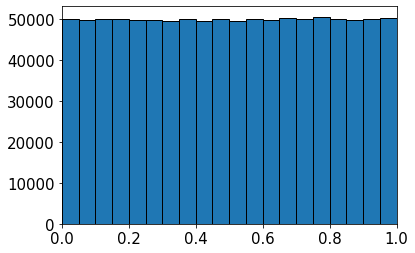

In [30]:
import random
x = []

# Here, you can set the size variable according to yourself to verify
# that the distribution graph is being plotted similarly to the LCG function
size = 1000000

for i in range(size):
    x.append(random.random())

# plotting the distribution of random variables in list x to verify the randomness and bias properties.
plt.hist(x, bins = 20, edgecolor = 'k')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(0,1)
plt.show()

# Trying to predict Pi using PRNG

## Calculating Pi:

### Pi is calculated by taking an inscribed circle (radius=1) inside a square (side = 2*r = 2). Then calculate the ratio of areaofcircle/areaofsquare and cleverly deducing that pi*r^2/4*r^2 = pi/4 ~ points in circle/ points in square.

#### Now points in square are all the points or total points and points in circle are those whose distance from the center(origin = (0,0) ) of the circe is < 1 as circle's radius is 1. Then, from the above equation - pi ~ (4*pointsincircle)/total points .

In [52]:
# importing time to calculate seed for each run of PRNG based on system's time in nanoseconds
import time

# definition of LCG algorithm that just gives one random variable based on algo and seed.
# Implemented this to cut down run time.
def nextRandLCA1(mult = 48271, mod = (2**31)-1, seed=123456789):
    x = (mult*seed)%mod
    return x/mod

# variable to count the number of random points inside the circle
pincirc1=0


for i in range(1000000):
    # taking different seeds for x and y for different random points inside a square 
    seed = int(str(time.time_ns())[-9:])
    x = nextRandLCA1(seed=seed)
    seed = int(str(seed*seed)[0:9])
    y = nextRandLCA1(seed=seed)
    
    # calculating distance of each point from center of circle or origin
    distance = (x*x+y*y)
    
    # increasing the points in circle if distance < 1
    if distance < 1*1:
        pincirc1 +=1

# calculating pi by approximating it to the ratio of points in circle/points in square(total points)
pi = (4*pincirc1)/1000000
print(pi)

3.144288


# Comparing with Random module

## right now, random module is outperforming the LCG algorithm implemented above

### I deduce that 3.0<=pred(pi)<=3.22. Furthermore, the error is due to the seed value which is taken from system's time and it is not varying much between each iteration of the for loop.

In [59]:
import random

# variable to count the no. of random points inside the circle
pincirc2 = 0
for i in range(1000000):
    x = random.random()
    y = random.random()
    
    distance = (x*x+y*y)
    
    if distance < 1:
        pincirc2 +=
        
        
pi = 4*pincirc2/1000000

print(pi)

3.142972


# Future Work:

### We can improve the pred(pi) by implement more advanced PRNG by implementing Mersenne Twister, PCG algorithm OR by taking a varying seed value each iteration of the for loop by some other technique.